In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Midterm Project for DATA 11800 - Fall  2022 (due November 10)

This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing. The score will be based on:
-  Clarity and soundness of the arguments and conclusions; 
-  Use of data to back up arguments and analysis quality;  
-  Insightfulness of the results;
-  Quality of the data vizualizations, summaries used, and overall presentation. Make sure you use headings, captions for figures and tables etc. When you interpret a graph or data from a table, you should clearly specify which figure/table you refer to.

The project is inspired from the current Fall Data Challenge from the American Statistical Association. You can find information about it here:
https://thisisstatistics.org/falldatachallenge/

The goal of the ASA Data challenge is to encourage contestants to "*dive into data on the impacts of school choice and family engagement in school activities and homework*" and to "*provide recommendations on factors that best optimize family involvement and support of K-12 students’ academic excellence*". Data about parent involvement in education and school choice from kindergarten to high school are currently collected in the [Parent and Family Involvement in Education (PFI)](https://nces.ed.gov/nhes/parent_involvement.asp).

Information about the data can be found [here](https://docs.google.com/document/d/1qXnbS4fjuQ9hbRxGaSmix3CGb3FUi6U5/) (there is an overview, links to the datasets, links to codebooks etc.):

The goal of this project is to gain insight into parent involvement using the tools you have learned so far in this class.

### The Data 

You can use any additional data you can find to get insight into this issue, but you need to specify the provenance of that data in your report. 

There are two years of data provided in the challenge: 2019 and 2016, and we only provide the 2019 data. Also included are a codebook (a pdf file containing information about each variable), and the list of variables in this dataset (an Excel file that points each variable in the data frame to info in the pdf file). You can easily download the 2016 dataset as well if you need it for your analysis, but that is optional.  For 2019, the data has 15,500 rows and 75 columns. 


In [3]:
# the smaller dataset
proj1_df=pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/PFI_2019.csv')
print(proj1_df.shape)
proj1_df.head(5)

(15500, 75)


,BASMID,ALLGRADEX,EDCPUB,SCCHOICE,SPUBCHOIX,SCONSIDR,SCHLHRSWK,EINTNET,MOSTIMPT,INTNUM,...,SEFUTUREX,DSBLTY,HHPARN19X,HHPARN19_BRD,NUMSIBSX,PARGRADEX,RACEETH,INTACC,CENREG,ZIPLOCL
0,20191000012,12,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,3,4,1,4,11
1,20191000029,4,1,2,3,2,4,3,-1,2,...,6,2,2,2,1,3,3,1,4,12
2,20191000059,11,2,2,2,1,4,3,2,2,...,5,2,2,2,1,5,2,3,2,11
3,20191000070,6,1,1,1,1,4,4,-1,-1,...,6,2,2,2,1,2,3,1,2,31
4,20191000078,9,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,5,5,1,2,21


In [4]:
# we need this for the note below
proj1_df.EDCPUB.value_counts()

1    13782
2     1718
Name: EDCPUB, dtype: int64

###  Note on the data

The codebook has table summaries for each variable but the numbers in there will not be the same as what you would obtain from these data. For example, for EDCPUB, the codebook shows 14,057 1's and 2,389 2's which is different than the output of the cell code above. The reason for this discrepancy: the dataset we provide has been curated (for example, the rows for home-schooled children were removed).


## The Assignment

### Report on your findings about schooling. 
Imagine you are serving as a consultant to a school district. You have been engaged to provide insights to the district on interpreting these survey results; the district would like to know where they should direct their attention for groups of students who may need help.

You must submit two files: 

1. The Jupyter Notebook that contains all the code you use for the analysis. You do not need to submit data you used, but just indicate how you obtained it in the Notebook.

2. A PDF report of your findings. **This report should be at most 4 pages long including references.** Use data visualization and data summaries to justify your conclusions. Note that the page limitation means you will not show all analyses and plots you will make - select carefully what you think is most relevant.

The report should address the following points:

A.  **Introduce the dataset**.  Who, what, where, and why was this data generated?  

B.  **Characteristics of sample**. Describe the sample of students and families in the dataset.    Summarize the distribution of one of the characteristics of the parents and households.  Some interesting variables you may consider include: marital status, employment, age, income, own/rent etc.  Graphs or tables of student and family characteristics may help here.

C. **Relationships in the sample.**  Check the relationship beween two of the student characteristics (race, sex, language spoken...) and at least two of school grades (ALLGRADEX), whether students are in public (EDCPUB), and student disability (DSBLTY).  For example, do you find evidence that students in public/private schools, or disabled / not disabled status have higher grades?

D. **Relationships with outcome variables.**  The family involvement variables are the ones starting with FO, and variables that measure student success include  measure SEENJOY, SEGRADES, and possibly SEGRADEDQ and SEABSENT.  Choose a variable to measure success and check the degree to which variables in family involvement seem to affect success.

E. **Provide context**  What do the relationships you discovered imply?  What are some questions about parental involvement in education that you would like to answer but are unable to with the current data set alone?  What data would you need to be able to answer them?

F. **Conclusion** What did you learn from exploring this dataset?

Your submission is to be uploaded to Canvas.  
There are some minimum requirements for your submission:

1. Upload your report in PDF format and the jupyter notebook containing your analysis code.
2. The report should be 4 pages maximum, including bibliography, tables and figures.
3. If your report uses outside results and/or data, proper citations must be provided.
    


## Part A

Variables of focus:
1. Income (TTLHHINC)
2. Student Grades (SEGRADES)
3. Parent Employment (P1EMPL)
4. Student Grade Level (ALLGRADEX)
5. Public School (EDCPUB)
6. Student Disability (DSBLTY)
7. Child's sex (CSEX)
8. Child's Race (CHISPAN: Hispanic, CAMIND: American Indian, CASIAN, CBLACK, CPAIC - Native Hawaiian, CWHITE)
9. Child home language (CSPEAKX)
10. Child ESL (CENGLPRG)
11. Child Enjoyment of School (SEENJOY)
12. Description of School work (SEGRADEQ)
13. Days Absent (SEABSNT)

## Part B

In [5]:
proj1_df['TTLHHINC'].value_counts().sort_index()

1      614
2      794
3     1065
4     1112
5     1012
6      969
7     1350
8     2196
9     2834
10    1541
11     733
12    1280
Name: TTLHHINC, dtype: int64

In [6]:
inc_str = '1 $0 to $10,000;2 $10,001 to $20,000;3 $20,001 to $30,000;4 $30,001 to $40,000;5 $40,001 to $50,000;6 $50,001 to $60,000;7 $60,001 to $75,000;8 $75,001 to $100,000;9 $100,001 to $150,000;10 $150,001 to $200,000;11 $200,001 to $250,000;12 $250,001 or more'
inc_cats = inc_str.split(';')
codes = [int(val.split(' ')[0]) for val in inc_cats]
#rngs = [' '.join(val.split(' ')[1:]).replace(' to ','-') for val in inc_cats]
rngs = ['<' + val.split(' ')[-1] if val.split(' ')[-1] != 'more' else val.split(' ')[-1] for val in inc_cats]

income_map = {c:r for c,r in zip(codes,rngs)}

In [7]:
income_map

{1: '<$10,000',
 2: '<$20,000',
 3: '<$30,000',
 4: '<$40,000',
 5: '<$50,000',
 6: '<$60,000',
 7: '<$75,000',
 8: '<$100,000',
 9: '<$150,000',
 10: '<$200,000',
 11: '<$250,000',
 12: 'more'}

In [8]:
len(proj1_df['TTLHHINC'].unique())

12

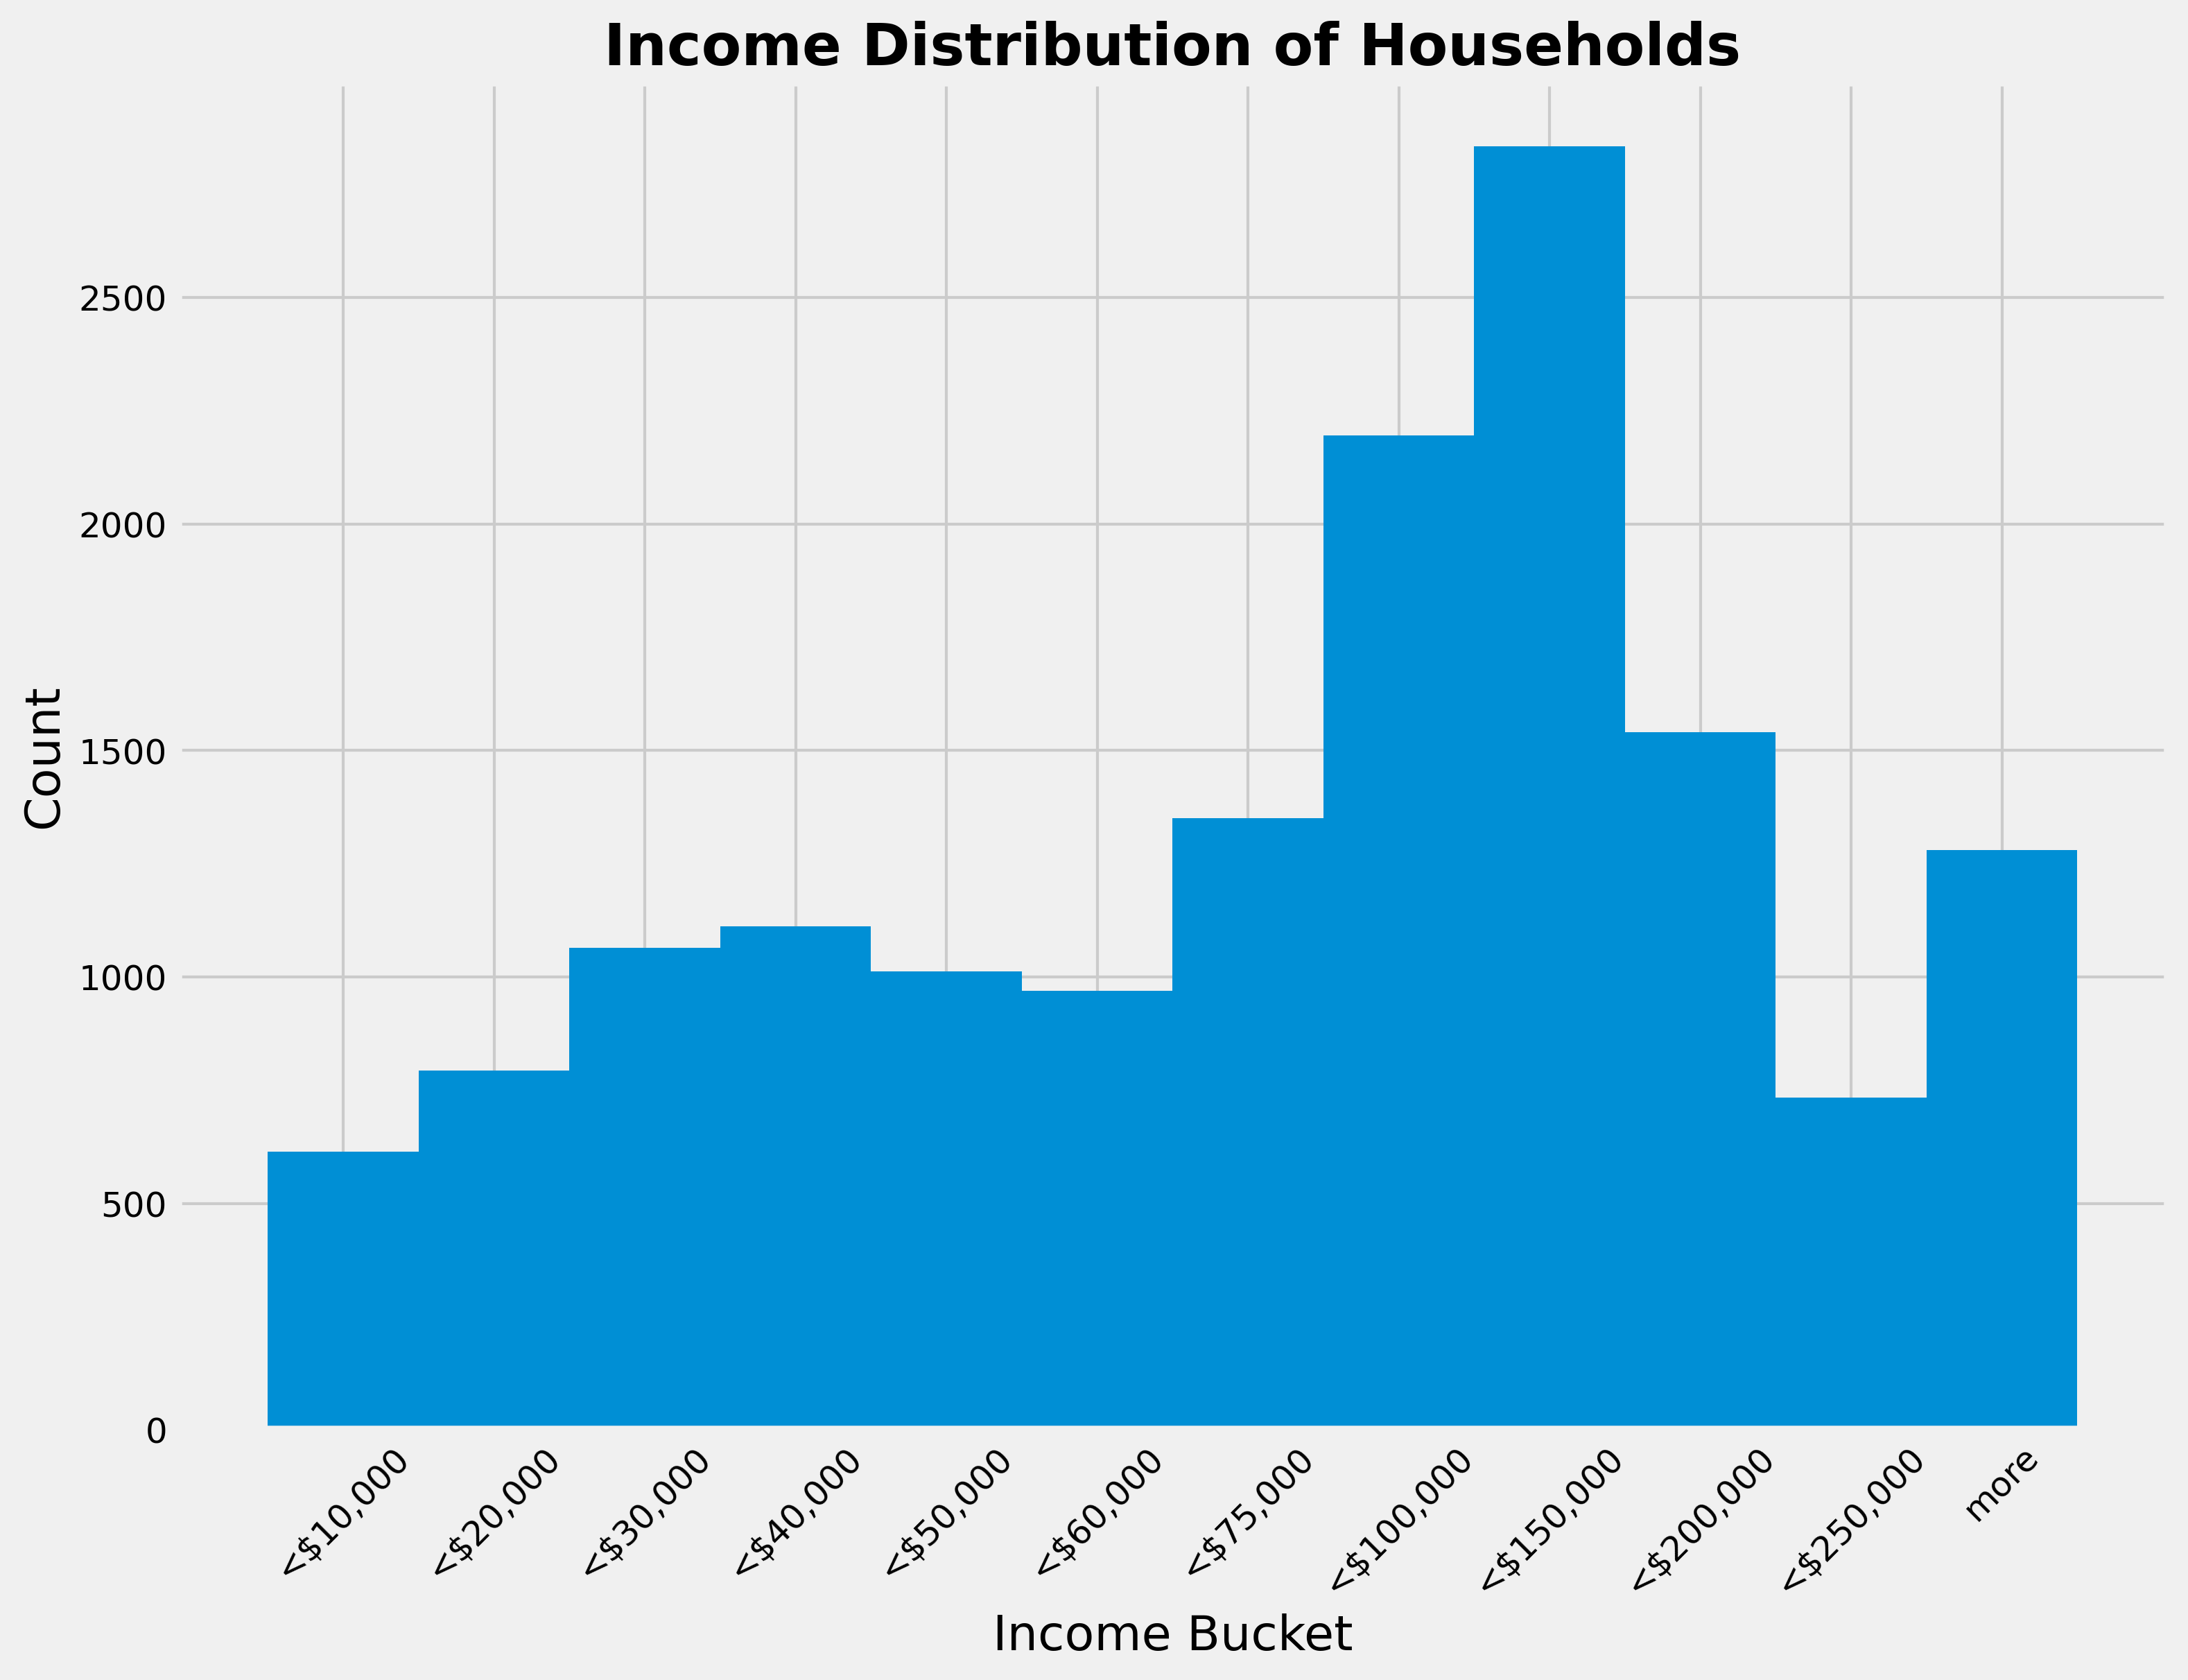

In [9]:
# COMPLETE
plt.figure(figsize = [11,8], dpi = 300)
plt.hist(proj1_df['TTLHHINC'],bins=np.arange(1,14)-0.5)
plt.xlabel('Income Bucket')
plt.ylabel('Count')
plt.title('Income Distribution of Households', fontweight='bold')
plt.xticks(ticks=range(1,13),labels=rngs)
plt.tick_params(axis='both', labelsize=12)
plt.tick_params(axis='x', labelrotation=45)

Text(0.5, 0, 'Student Grade Level')

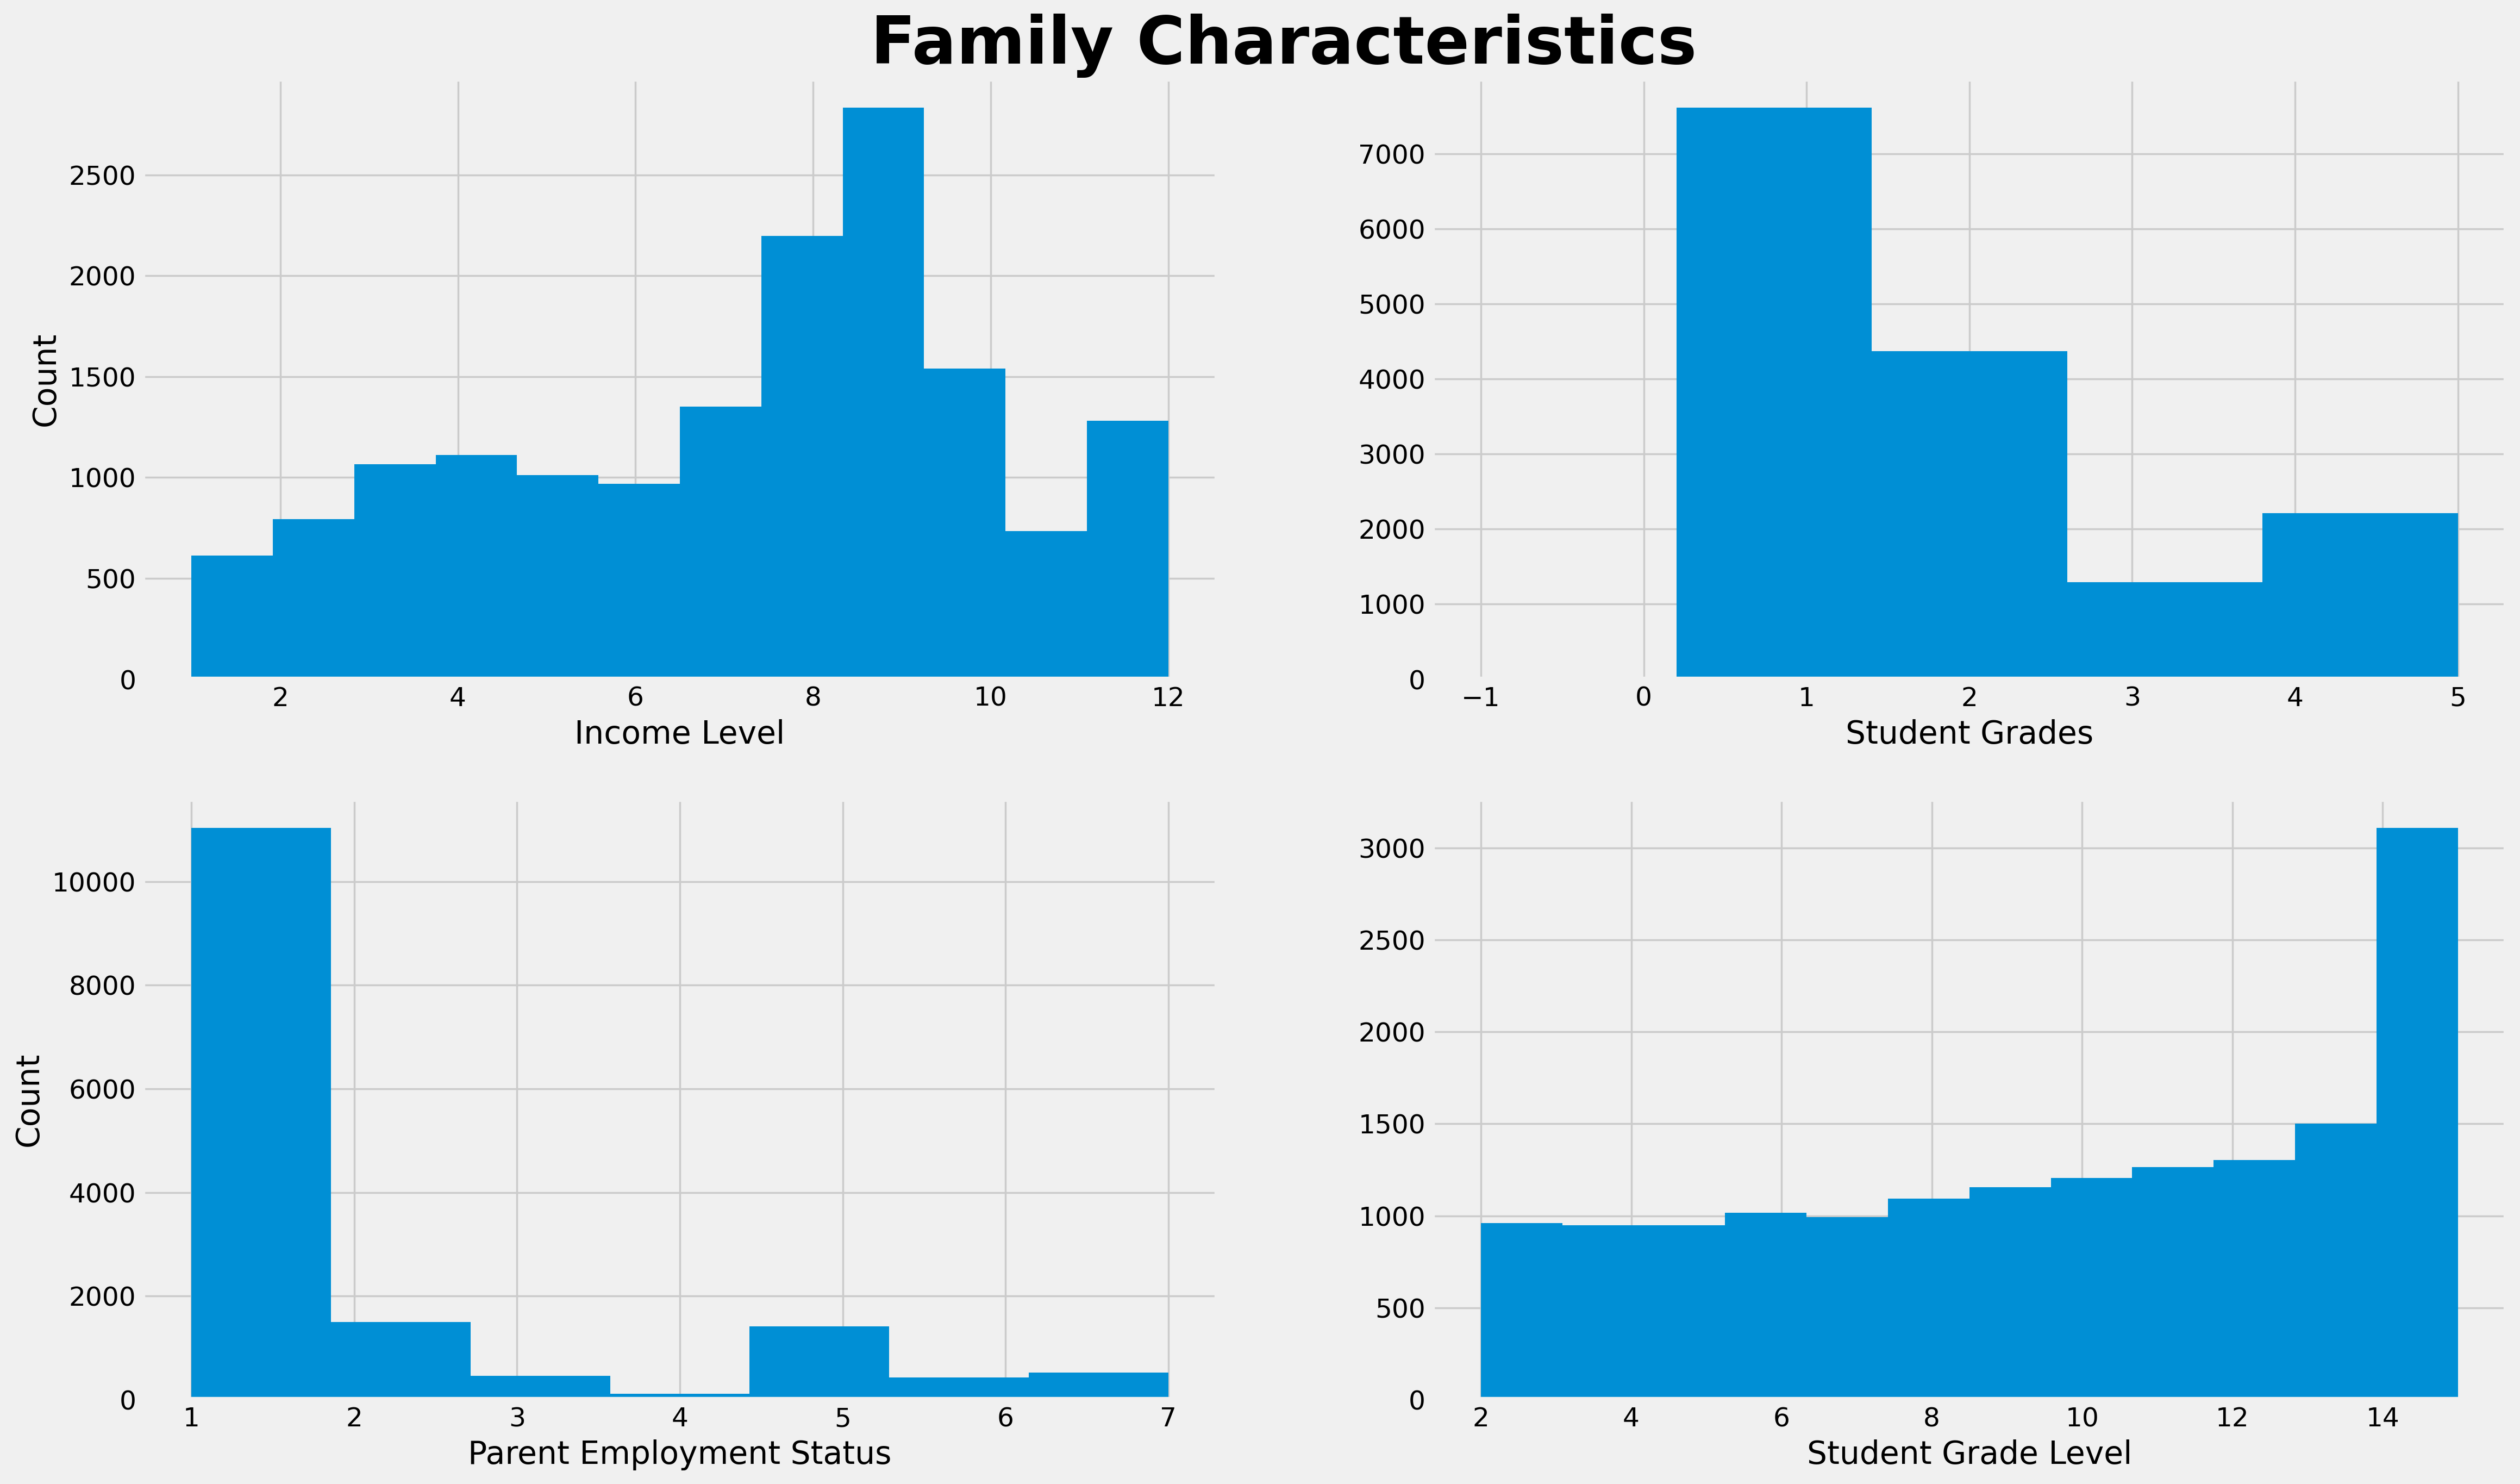

In [10]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Family Characteristics', y = 0.92, fontsize = 35, fontweight='bold')
fig.set_size_inches(20, 12)
fig.set_dpi(250)

# Income
axs[0,0].hist(proj1_df['TTLHHINC'],bins = 12)
axs[0,0].set_xlabel('Income Level')
axs[0,0].set_ylabel('Count')

# Student Grades
axs[0,1].hist(proj1_df['SEGRADES'],bins = 5)
axs[0,1].set_xlabel('Student Grades')

# Parent Employment
axs[1,0].hist(proj1_df['P1EMPL'],bins = 7)
axs[1,0].set_xlabel('Parent Employment Status')
axs[1,0].set_ylabel('Count')

# Grade Level
axs[1,1].hist(proj1_df['ALLGRADEX'],bins = 12)
axs[1,1].set_xlabel('Student Grade Level')

In [11]:
type(fig)

matplotlib.figure.Figure

In [12]:
proj1_df.columns

Index(['BASMID', 'ALLGRADEX', 'EDCPUB', 'SCCHOICE', 'SPUBCHOIX', 'SCONSIDR',
       'SCHLHRSWK', 'EINTNET', 'MOSTIMPT', 'INTNUM', 'SEENJOY', 'SEGRADES',
       'SEABSNT', 'SEGRADEQ', 'FSSPORTX', 'FSVOL', 'FSMTNG', 'FSPTMTNG',
       'FSATCNFN', 'FSFUNDRS', 'FSCOMMTE', 'FSCOUNSLR', 'FSFREQ', 'FSNOTESX',
       'FSMEMO', 'FCSCHOOL', 'FCTEACHR', 'FCSTDS', 'FCORDER', 'FCSUPPRT',
       'FHHOME', 'FHWKHRS', 'FHAMOUNT', 'FHCAMT', 'FHPLACE', 'FHCHECKX',
       'FHHELP', 'FOSTORY2X', 'FOCRAFTS', 'FOGAMES', 'FOBUILDX', 'FOSPORT',
       'FORESPON', 'FOHISTX', 'FODINNERX', 'FOLIBRAYX', 'FOBOOKSTX',
       'HDHEALTH', 'CDOBMM', 'CDOBYY', 'CSEX', 'CSPEAKX', 'HHTOTALXX',
       'RELATION', 'P1REL', 'P1SEX', 'P1MRSTA', 'P1EMPL', 'P1HRSWK',
       'P1MTHSWRK', 'P1AGE', 'P2GUARD', 'TTLHHINC', 'OWNRNTHB', 'CHLDNT',
       'SEFUTUREX', 'DSBLTY', 'HHPARN19X', 'HHPARN19_BRD', 'NUMSIBSX',
       'PARGRADEX', 'RACEETH', 'INTACC', 'CENREG', 'ZIPLOCL'],
      dtype='object')

In [13]:
proj1_df['ALLGRADEX'].unique()

array([12,  4, 11,  6,  9,  8,  5,  2, 15, 14,  7, 10, 13,  3],
      dtype=int64)

## Part C
**Relationships in the sample.**  Check the relationship beween two of the student characteristics (race, sex, language spoken...) and at least two of school grades (ALLGRADEX), whether students are in public (EDCPUB), and student disability (DSBLTY).  For example, do you find evidence that students in public/private schools, or disabled / not disabled status have higher grades?

Planned relationships:

race: RACEETH, sex: CSEX, language spoken: CSPEAKX, grade (score): SEGRADES

indicators: public, disability

**GRADES**
1. public vs grades
2. disabled vs grades
3. race vs grades
4. language spoken vs grades
5. sex vs grades

**Cross-Relationships**
1. public vs disabled
2. public vs race
3. public vs language spoken
4. public vs sex
5. race vs disabled
6. race vs public
7. race vs sex
8. race vs language spoken 

In [30]:
lang_txt = """1 Child is not able to speak
2 English 
3 Spanish 
4 English and Spanish equally
5 A language other than English or Spanish
6 English and another language equally
"""
grades_txt = """-1 Valid Skip
1 Mostly A’s
2 Mostly B’s
3 Mostly C’s
4 Mostly D’s
5 School does not give these grades
"""
race_txt = """1 White, non-Hispanic
2 Black, non-Hispanic
3 Hispanic
4 Asian or Pacific Islander, non-Hispanic
5 All other races and multiple races, non-Hispanic
"""

In [31]:
lang_map = {int(val.split(' ')[0]):' '.join(val.split(' ')[1:]) for val in lang_txt.split('\n') if val != ''}
grades_map = {int(val.split(' ')[0]):' '.join(val.split(' ')[1:]) for val in grades_txt.split('\n') if val != ''}
race_map = {int(val.split(' ')[0]):' '.join(val.split(' ')[1:]) for val in race_txt.split('\n') if val != ''}

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

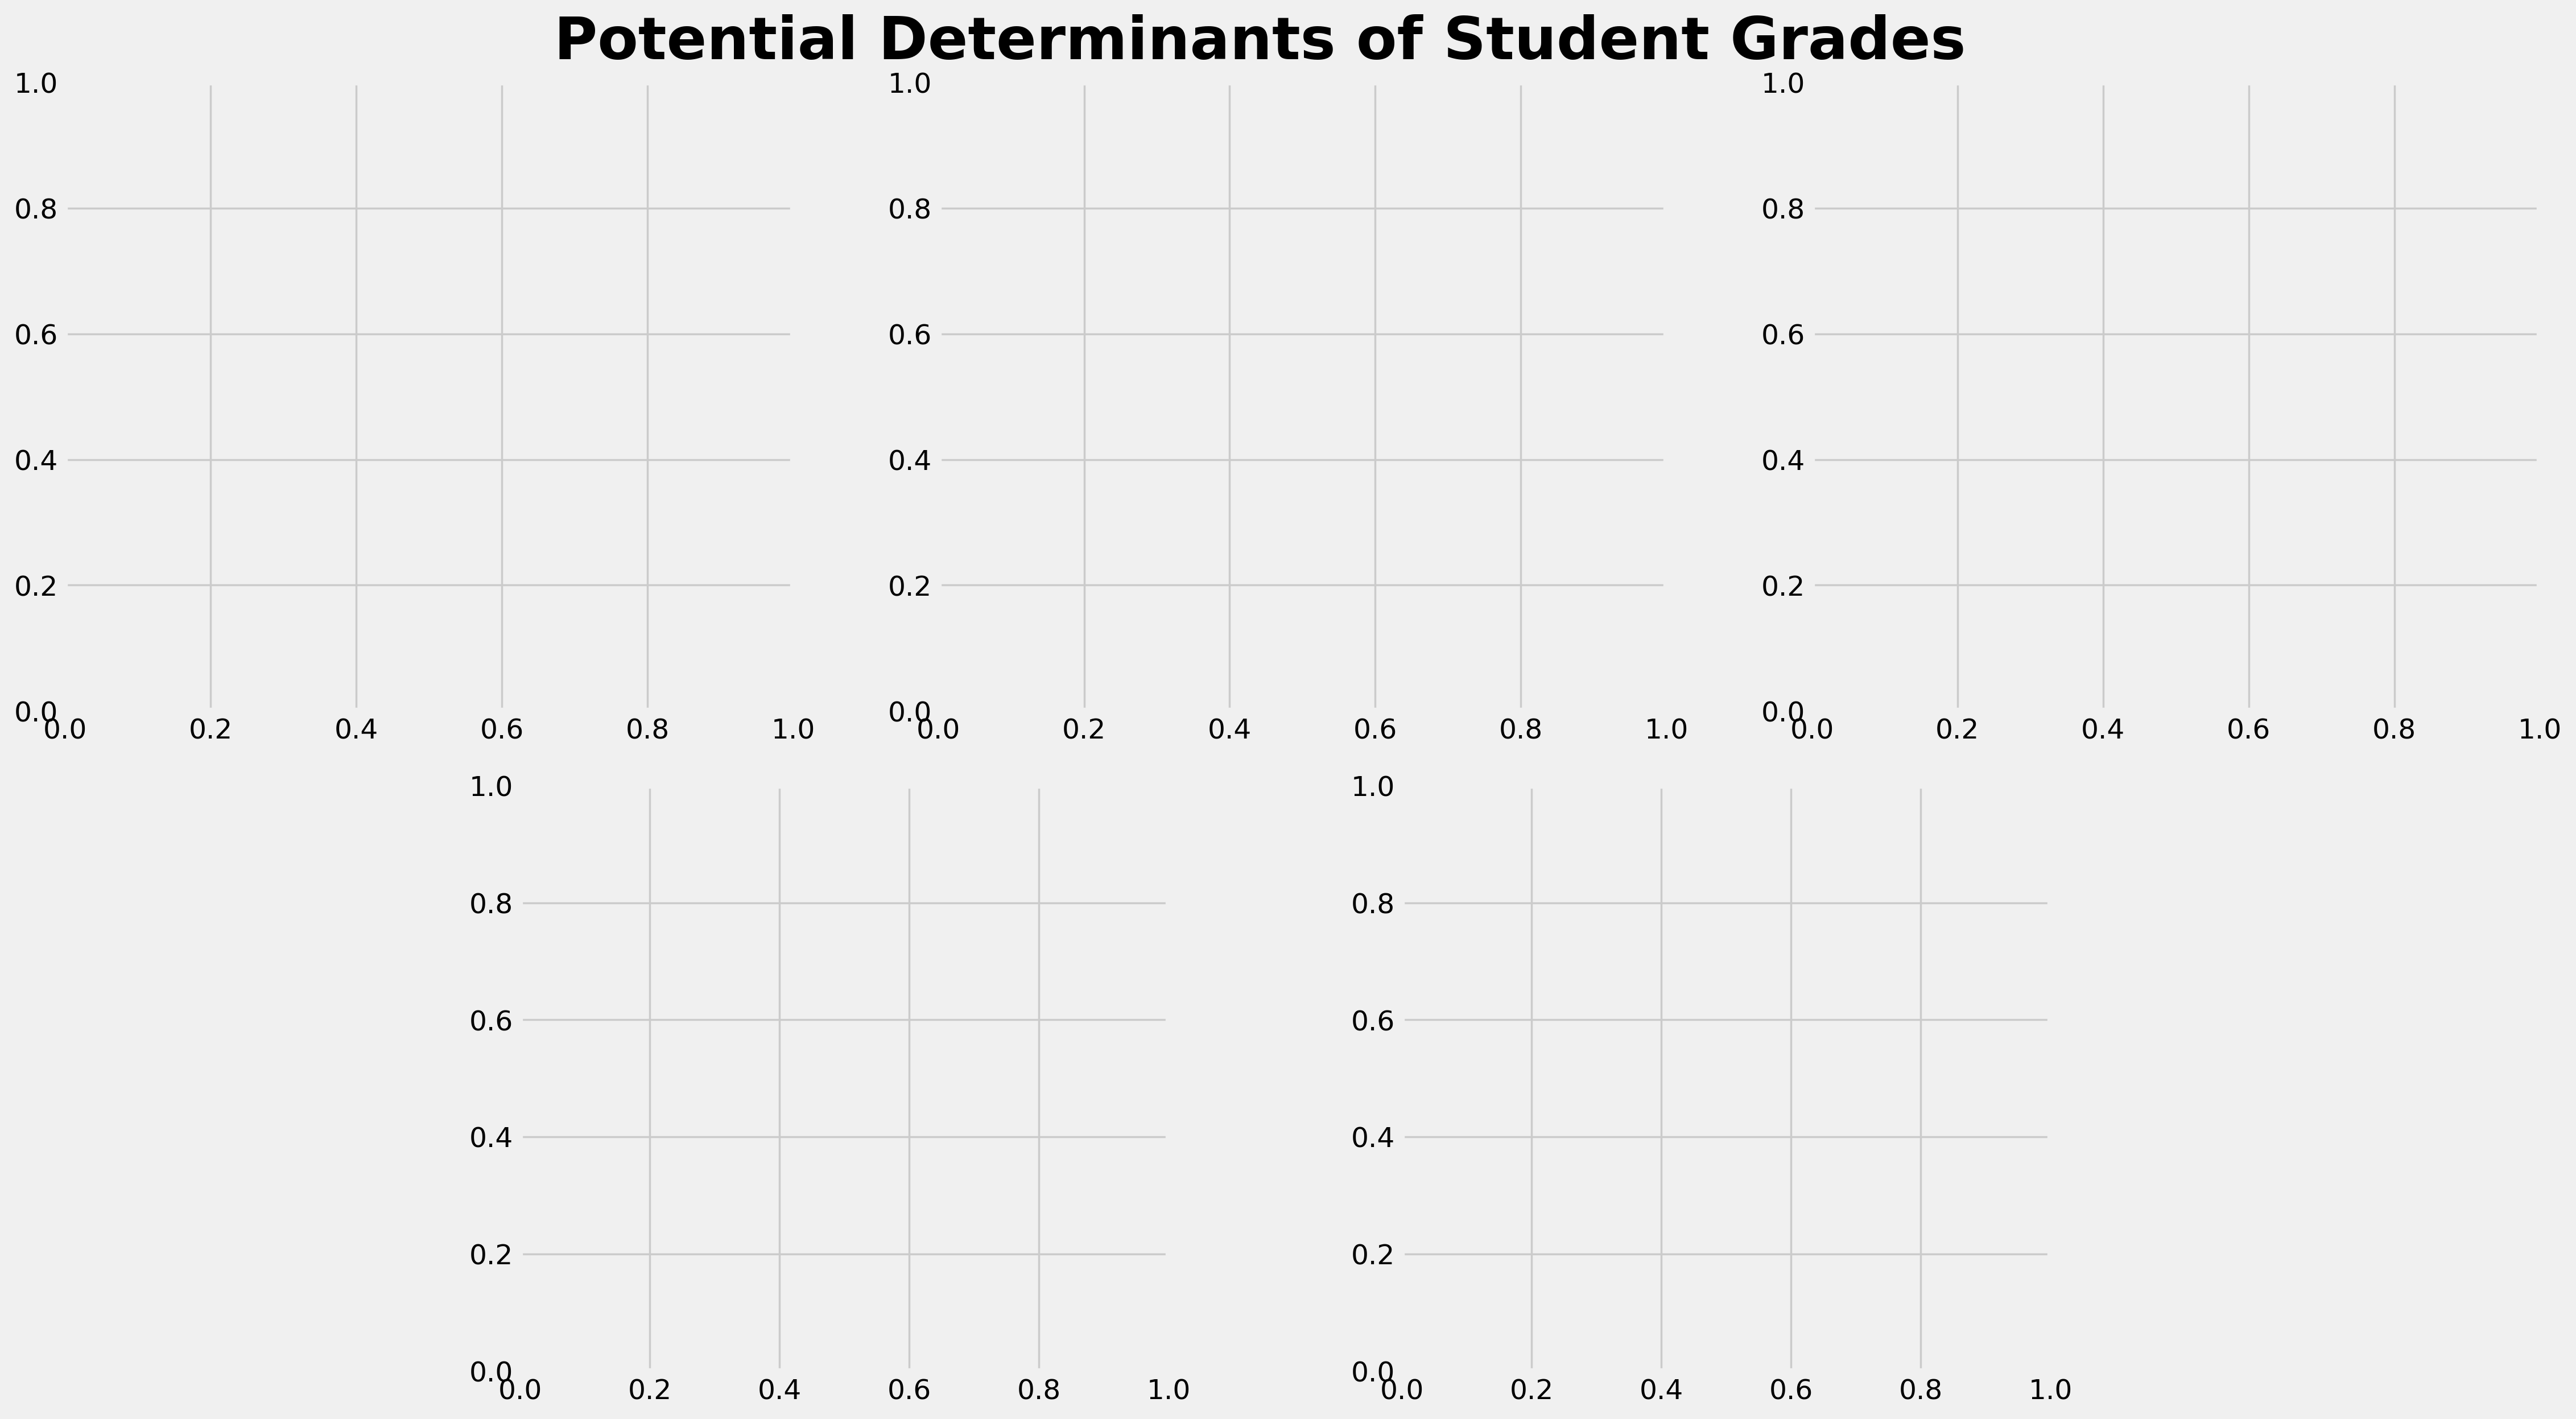

In [44]:
# Grade relationships
fig, axes = plt.subplots(2, 3)
fig.suptitle('Potential Determinants of Student Grades', y = 0.92, fontsize = 30, fontweight='bold')
fig.set_size_inches(20, 12)
fig.set_dpi(250)

# modifying grid for 5 plots
axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

# Making graphs
axes[0,0].boxplot(proj1_df['EDCPUB'].replace({1:'Public',2:'Not Public'}),proj1_df['SEGRADES'])
axes[0,0].set_xlabel('Public School Indicator')
axes[0,0].set_ylabel('Student Grades (Scores)')

axes[0,1].boxplot(proj1_df['DSBLTY'].replace({1:'Has Disability',2:'Does not have Disability'}),proj1_df['SEGRADES'])
axes[0,1].set_xlabel('Disability Indicator')

axes[0,2].boxplot(proj1_df['RACEETH'].replace(race_map),proj1_df['SEGRADES'])
axes[0,2].set_xlabel('Student Race')

axes[1,0].boxplot(proj1_df['CSPEAKX'].replace(lang_map),proj1_df['SEGRADES'])
axes[1,0].set_xlabel('Language Spoken at Home')
axes[1,0].set_ylabel('Student Grades (Scores)')

axes[1,1].boxplot(proj1_df['CSEX'].replace({1:'Male',2:'Female'}),proj1_df['SEGRADES'])
axes[1,1].set_xlabel('Student Sex')